In [865]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import ndimage
import json
import time
import os
from PIL import Image


In [866]:
# pip install scikit-learn instead of sklearn
from sklearn import preprocessing


# 模板

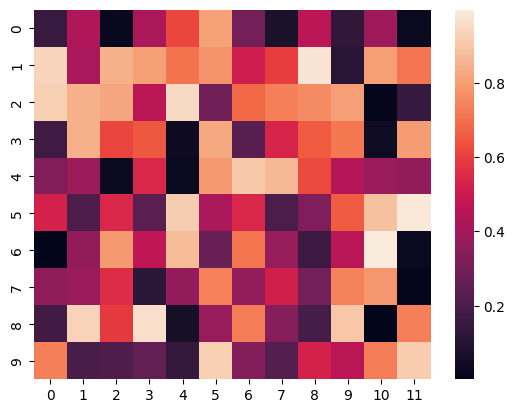

In [867]:
uniform_data = np.random.rand(10, 12)  # 自定义数据
ax = sns.heatmap(uniform_data)


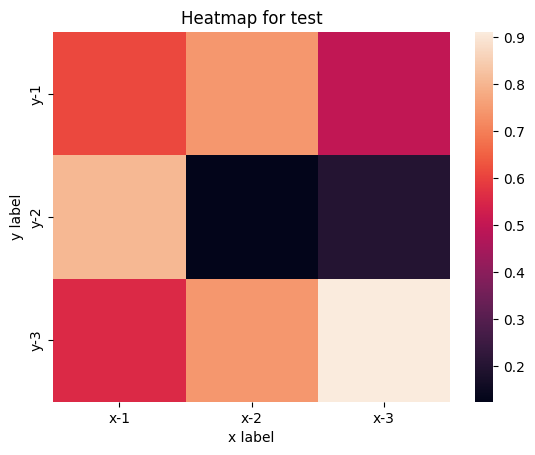

In [868]:
values = np.random.rand(3, 3)
x_ticks = ['x-1', 'x-2', 'x-3']
y_ticks = ['y-1', 'y-2', 'y-3']  # 自定义横纵轴
ax = sns.heatmap(values, xticklabels=x_ticks, yticklabels=y_ticks)
ax.set_title('Heatmap for test')  # 图标题
ax.set_xlabel('x label')  # x轴标题
ax.set_ylabel('y label')
plt.show()
figure = ax.get_figure()
# figure.savefig('sns_heatmap.jpg')  # 保存图片


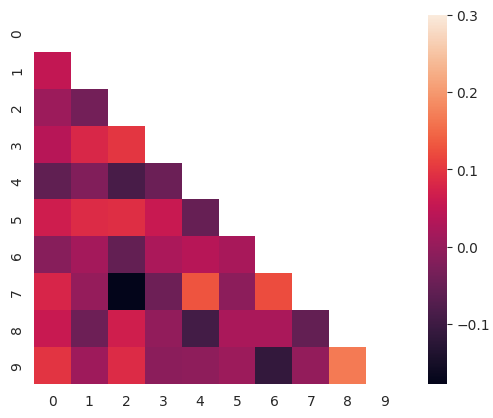

In [869]:
# 使用掩码，绘制部分数据
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)


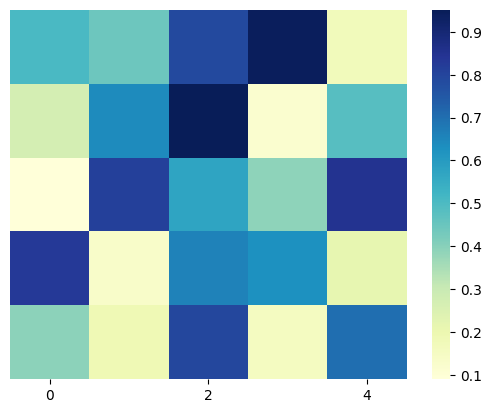

In [870]:
values = np.random.rand(5, 5)
ax = sns.heatmap(values, cmap="YlGnBu", xticklabels=2,
                 yticklabels=False)  # x轴变2倍，隐藏y轴


# 实现

## 师兄的代码

In [871]:
min_max_scaler = preprocessing.MinMaxScaler()


In [872]:
class HeatMap:
    def __init__(self):
        # 根据时间生成随机数，保证每次都不一样
        np.random.seed(int(time.time()))
        self.fig, self.axes = plt.subplots()

    def plot_heatmap(self, img, heatmap):
        print("Image shape", img.shape)
        normalized_heat_map = self.get_heatmap_array(img, heatmap)
        # 去除坐标轴
        # self.axes.cla()
        self.axes.imshow(img)
        # self.axes.imshow(255 * normalized_heat_map, alpha=0.5, cmap="RdBu")
        # self.axes.set_axis_off()
        self.axes = sns.heatmap(255 * normalized_heat_map, cmap='Set1_r',
                                ax=self.axes, annot=False, fmt='0.1g', alpha=0.5)
        plt.show()

    def get_heatmap_array(self, img, heat):
        height, width, _ = img.shape
        print(height, width)
        print(heat[:10])
        heat[:, 0] *= height
        heat[:, 1] *= width
        print(heat[:10])
        x = np.zeros((height, width))

        def count_heat(i):
            try:
                x[int(i[0]), int(i[1])] += 1
            except:
                pass
        # 必选参数：func,axis,arr。其中func是我们自定义的一个函数，函数func(arr)中的arr是一个数组，函数的主要功能就是对数组里的每一个元素进行变换，得到目标的结果。其中axis表示函数func对数组arr作用的轴。
        np.apply_along_axis(count_heat, axis=1, arr=heat)
        heat_map = ndimage.gaussian_filter(x, sigma=15)
        # 归一化
        normalized_heat_map = min_max_scaler.fit_transform(heat_map)
        return normalized_heat_map

    @staticmethod
    def get_json_file():
        # current_work_dir = os.path.abspath(os.path.dirname(os.path.dirname(__file__)))
        current_work_dir = '..'
        json_path = os.path.join(current_work_dir, 'gaze.json')
        with open(json_path, 'r+') as f:
            data = json.load(f)
        gaze = np.asarray(data['direction'], dtype=np.float32)
        return gaze


In [873]:
gaze = HeatMap.get_json_file()
gaze[:10]


array([[-15.067382  ,  -5.807486  ],
       [-11.755453  ,  -0.8884562 ],
       [-15.443179  ,  -3.8721843 ],
       [-10.091056  ,  -6.3552356 ],
       [-16.14887   , -11.195782  ],
       [-17.211065  ,   2.395562  ],
       [-15.999188  , -10.647096  ],
       [-19.39124   ,  -0.34083626],
       [-13.160399  , -11.476885  ],
       [-19.775436  ,   5.286719  ]], dtype=float32)

## 0-1 归一化

In [874]:
data_train_nomal = min_max_scaler.fit_transform(gaze)


In [875]:
min_max_scaler.scale_
min_max_scaler.min_


array([0.95318127, 0.38185135], dtype=float32)

In [876]:
data_train_nomal[:10]


array([[0.38742805, 0.25246847],
       [0.51178503, 0.36205775],
       [0.37331754, 0.29558435],
       [0.57428014, 0.24026534],
       [0.34682006, 0.13242455],
       [0.30693656, 0.4352212 ],
       [0.35244036, 0.14464852],
       [0.22507495, 0.37425798],
       [0.45903182, 0.12616196],
       [0.21064901, 0.49963224]], dtype=float32)

Image shape (768, 1024, 3)
768 1024
[[0.38742805 0.25246847]
 [0.51178503 0.36205775]
 [0.37331754 0.29558435]
 [0.57428014 0.24026534]
 [0.34682006 0.13242455]
 [0.30693656 0.4352212 ]
 [0.35244036 0.14464852]
 [0.22507495 0.37425798]
 [0.45903182 0.12616196]
 [0.21064901 0.49963224]]
[[297.54474 258.5277 ]
 [393.0509  370.74713]
 [286.7079  302.67838]
 [441.04715 246.03171]
 [266.3578  135.60274]
 [235.72728 445.6665 ]
 [270.6742  148.12009]
 [172.85756 383.24017]
 [352.53644 129.18985]
 [161.77844 511.6234 ]]


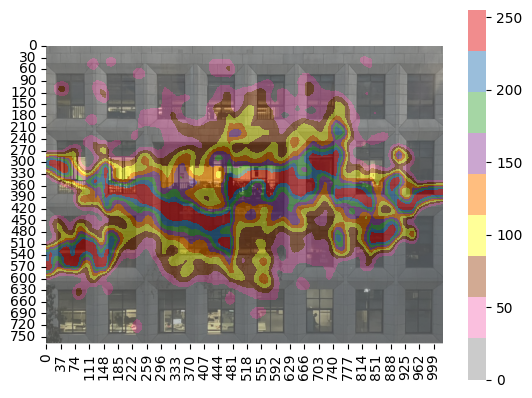

In [877]:
heatmap = HeatMap()
img = np.array(Image.open('1.jpeg'))
heatmap.plot_heatmap(img, data_train_nomal)
